<a href="https://colab.research.google.com/github/rakibsxyz/100-days-of-code/blob/master/kMeansMultiDimentionalPracticeOnCollegeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
#import sklearn.cluster.hierarchical as hclust
from sklearn import preprocessing
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/sPL3/College.csv')

In [3]:
print(df.shape)
df.head()

(777, 19)


Unnamed: 0 Private  Apps  ...  perc.alumni  Expend  Grad.Rate
0  Abilene Christian University     Yes  1660  ...           12    7041         60
1            Adelphi University     Yes  2186  ...           16   10527         56
2                Adrian College     Yes  1428  ...           30    8735         54
3           Agnes Scott College     Yes   417  ...           37   19016         59
4     Alaska Pacific University     Yes   193  ...            2   10922         15

[5 rows x 19 columns]

In [4]:
features = df.drop(['Private', 'Unnamed: 0'],axis=1)

In [7]:
features['Acceptperc'] = features['Accept'] / features['Apps']
features['Enrollperc'] = features['Enroll'] / features['Accept']

In [8]:
features.describe()

Apps        Accept  ...  Acceptperc  Enrollperc
count    777.000000    777.000000  ...  777.000000  777.000000
mean    3001.638353   2018.804376  ...    0.746928    0.412015
std     3870.201484   2451.113971  ...    0.147104    0.133989
min       81.000000     72.000000  ...    0.154486    0.099754
25%      776.000000    604.000000  ...    0.675647    0.317204
50%     1558.000000   1110.000000  ...    0.778750    0.387419
75%     3624.000000   2424.000000  ...    0.848522    0.485674
max    48094.000000  26330.000000  ...    1.000000    1.000000

[8 rows x 19 columns]

In [10]:
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(features)

In [11]:
pd.DataFrame(features_normal).describe()

0           1           2   ...          16          17          18
count  777.000000  777.000000  777.000000  ...  777.000000  777.000000  777.000000
mean     0.060830    0.074141    0.117189  ...    0.513549    0.700688    0.346862
std      0.080607    0.093347    0.146166  ...    0.159053    0.173982    0.148836
min      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      0.014475    0.020260    0.032563  ...    0.398148    0.616384    0.241545
50%      0.030763    0.039531    0.062765  ...    0.509259    0.738325    0.319540
75%      0.073793    0.089573    0.136385  ...    0.629630    0.820845    0.428683
max      1.000000    1.000000    1.000000  ...    1.000000    1.000000    1.000000

[8 rows x 19 columns]

In [12]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(features_normal)
    kmeanModel.fit(features_normal)
    inertia.append(kmeanModel.inertia_)

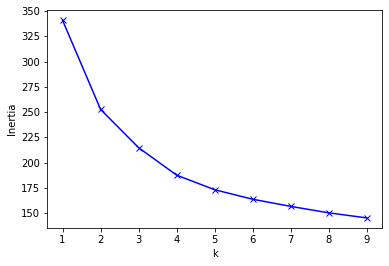

In [13]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4).fit(features_normal)

In [15]:
labels = pd.DataFrame(kmeans.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labeledColleges = pd.concat((features,labels),axis=1)
labeledColleges = labeledColleges.rename({0:'labels'},axis=1)

In [16]:
labeledColleges.head()

Apps  Accept  Enroll  Top10perc  ...  Grad.Rate  Acceptperc  Enrollperc  labels
0  1660    1232     721         23  ...         60    0.742169    0.585227       2
1  2186    1924     512         16  ...         56    0.880146    0.266112       2
2  1428    1097     336         22  ...         54    0.768207    0.306290       2
3   417     349     137         60  ...         59    0.836930    0.392550       3
4   193     146      55         16  ...         15    0.756477    0.376712       2

[5 rows x 20 columns]

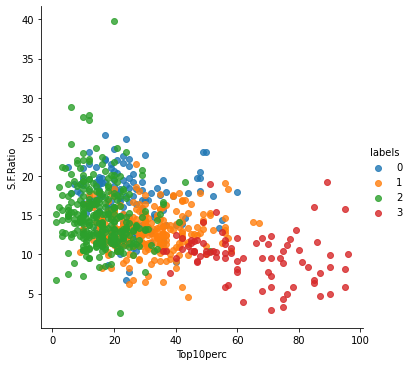

In [17]:
sns.lmplot(x='Top10perc',y='S.F.Ratio',data=labeledColleges,hue='labels',fit_reg=False)

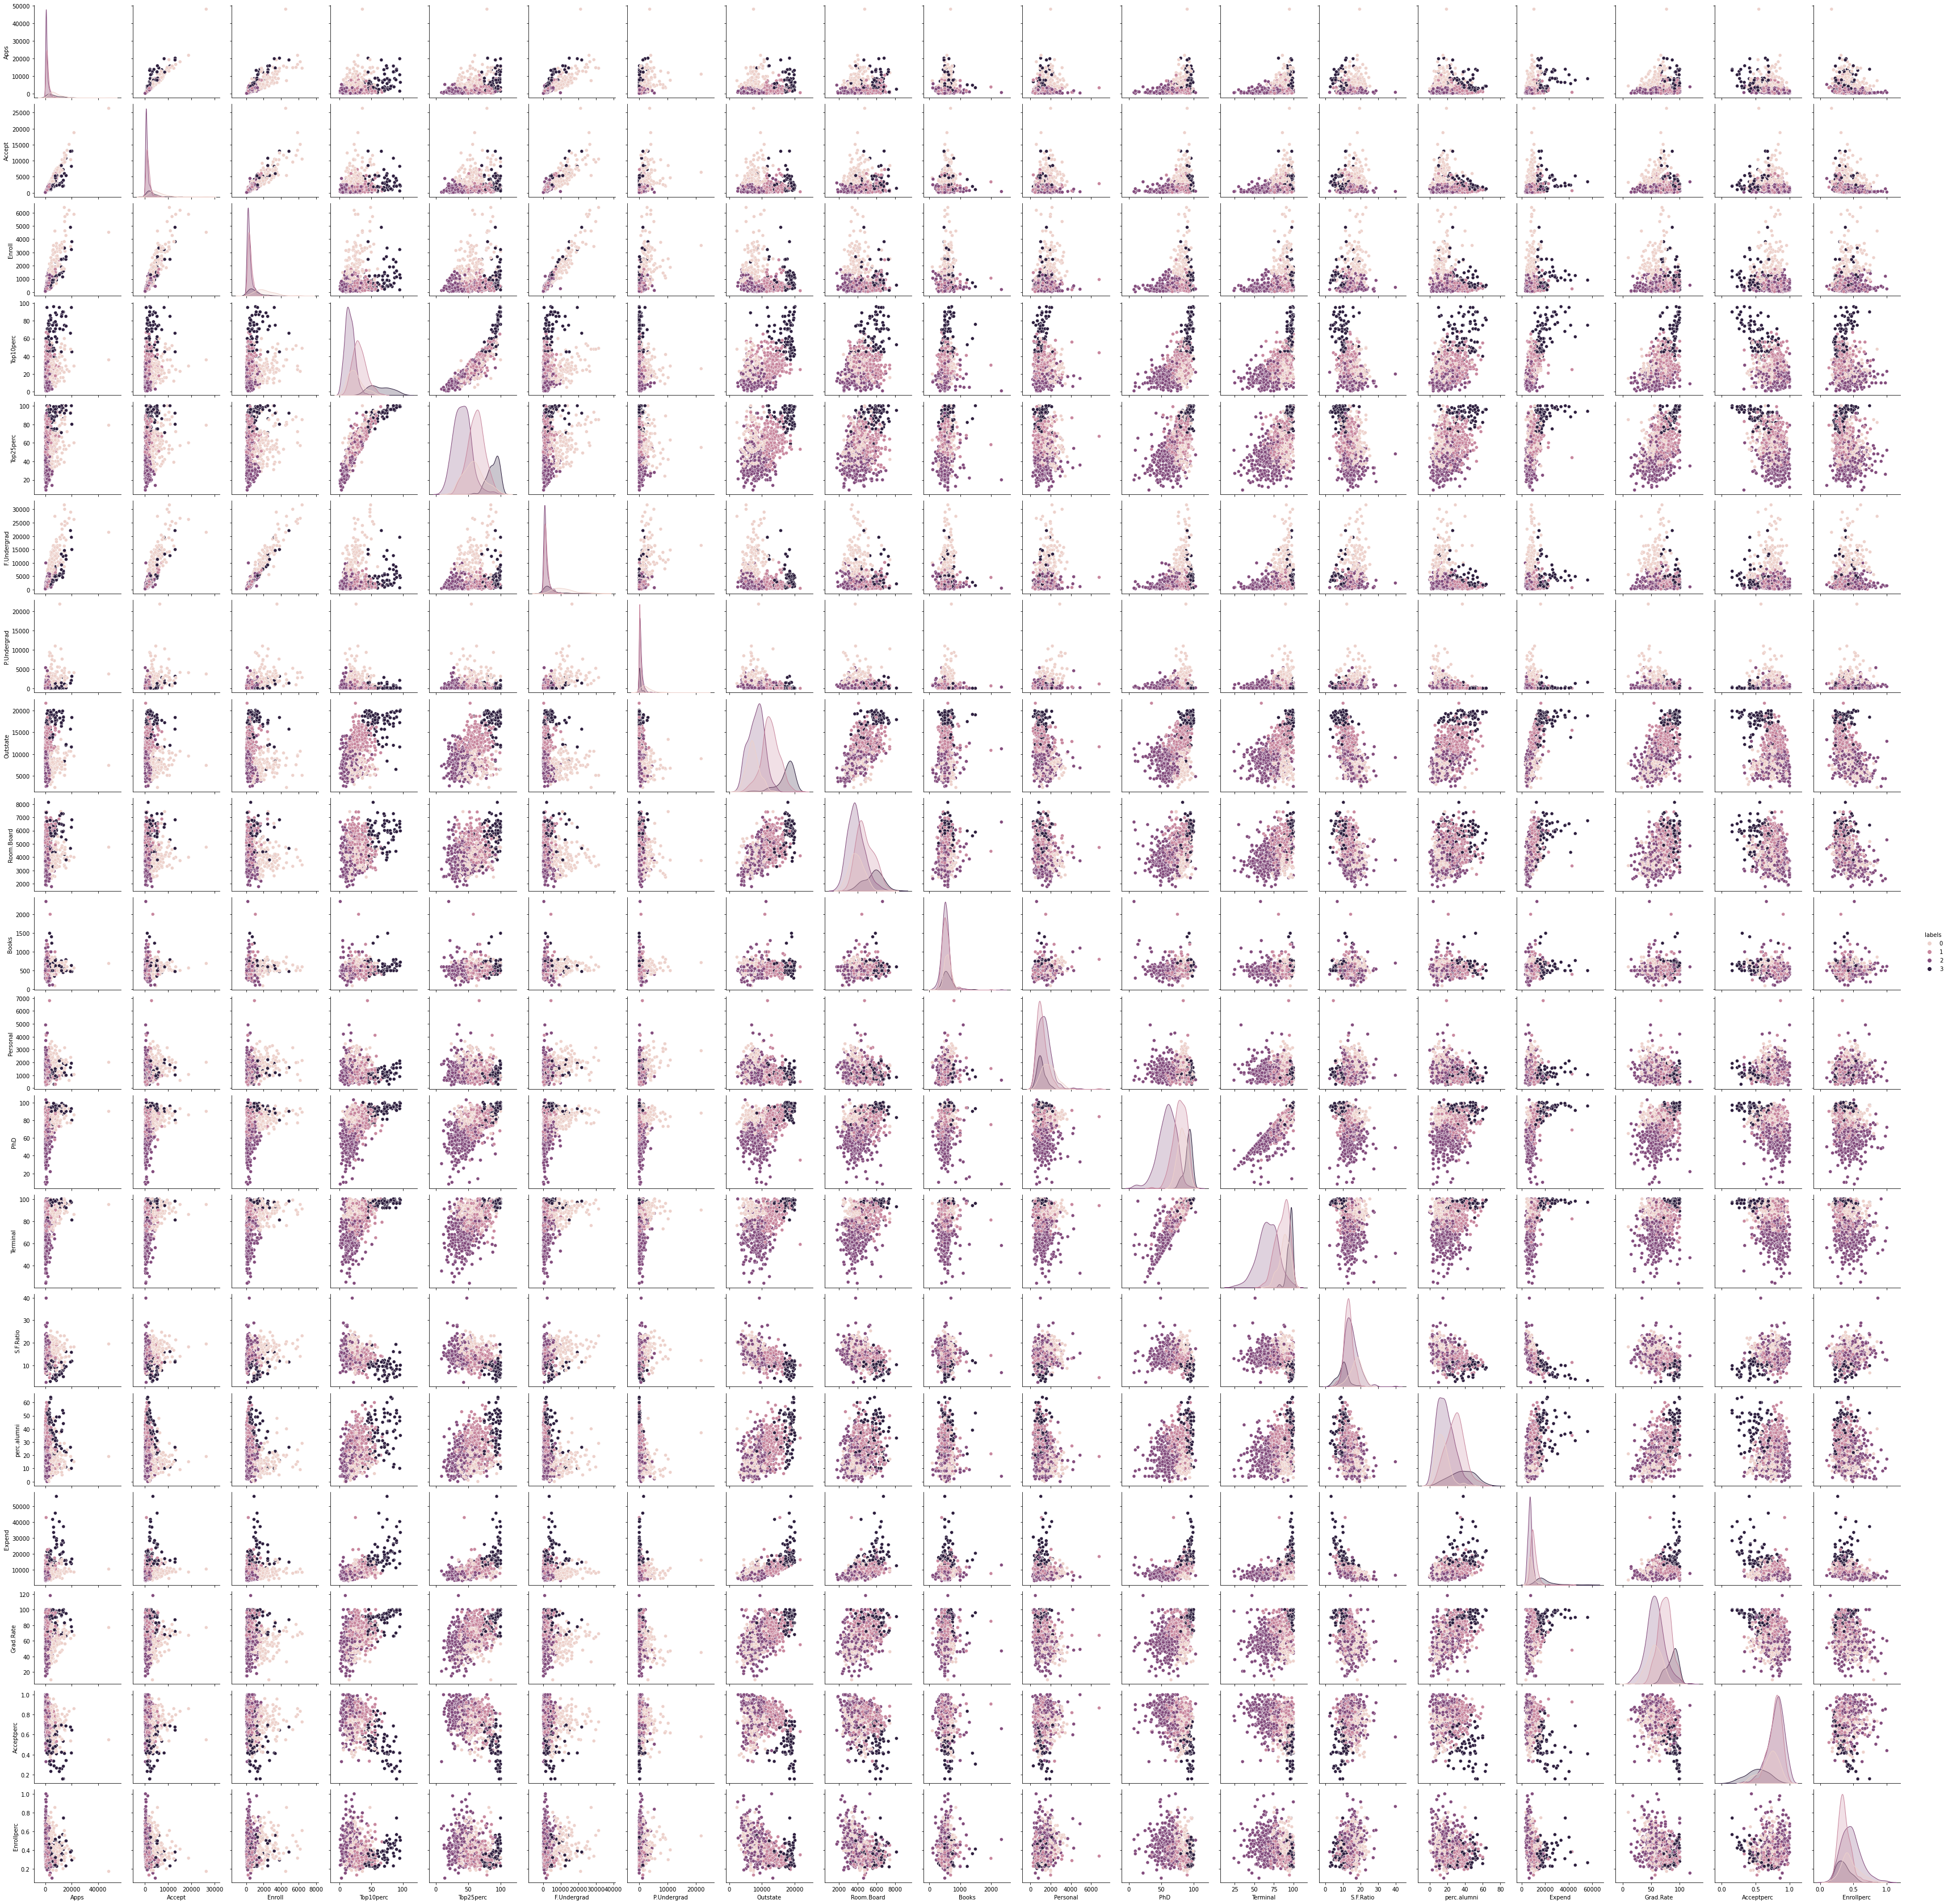

In [18]:
sns.pairplot(labeledColleges,hue='labels')

In [19]:
labeledColleges['Constant'] = "Data"

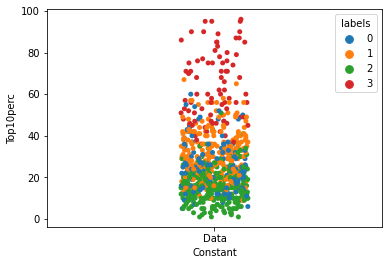

In [24]:
sns.stripplot(x=labeledColleges['Constant'],y=labeledColleges['Top10perc'],hue=labeledColleges['labels'],jitter=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


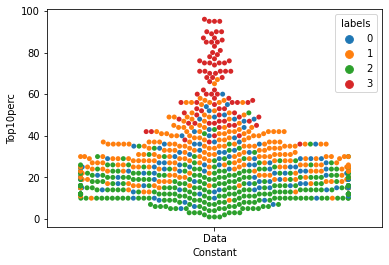

In [25]:
sns.swarmplot(x=labeledColleges['Constant'],y=labeledColleges['Top10perc'],hue=labeledColleges['labels'])

In [26]:
colleges = df['Unnamed: 0']
colleges = pd.concat((colleges,labels),axis=1)
colleges = colleges.rename({'Unnamed: 0':'College',0:'Cluster'},axis=1)
sortcolleges = colleges.sort_values(['Cluster'])
pd.set_option('display.max_rows', 1000)
sortcolleges

College  Cluster
698             University of Wisconsin-Whitewater        0
657                      University of North Texas        0
656                    University of North Florida        0
655                     University of North Dakota        0
654     University of North Carolina at Wilmington        0
365                     Miami University at Oxford        0
366                      Michigan State University        0
104                  Central Washington University        0
103              Central Missouri State University        0
711               Virginia Commonwealth University        0
369               Millersville University of Penn.        0
653     University of North Carolina at Greensboro        0
713                                  Virginia Tech        0
652      University of North Carolina at Charlotte        0
581             Texas A&M Univ. at College Station        0
650      University of North Carolina at Asheville        0
375                   Mississippi State University        0
649                    University of New Hampshire        0
642             University of Missouri at Columbia        0
206                             Fort Lewis College        0
288                        Kansas State University        0
203                       Florida State University        0
727                    Washington State University        0
78                 California Polytechnic-San Luis        0
658                University of Northern Colorado        0
675       University of South Carolina at Columbia        0
536            Southwest Missouri State University        0
647              University of Nebraska at Lincoln        0
383                     Montclair State University        0
382                       Montana State University        0
585                      Texas Southern University        0
583                     Texas Christian University        0
201               Florida International University        0
406       New Mexico Institute of Mining and Tech.        0
659                    University of Northern Iowa        0
176                       East Carolina University        0
680             University of Southern Mississippi        0
324      Louisiana State University at Baton Rouge        0
567                       SUNY College at Cortland        0
568                       SUNY College at Fredonia        0
565                        SUNY College  at Oswego        0
564                     SUNY College  at Brockport        0
683           University of Tennessee at Knoxville        0
684               University of Texas at Arlington        0
685                  University of Texas at Austin        0
686             University of Texas at San Antonio        0
563                            SUNY at Stony Brook        0
562                                SUNY at Buffalo        0
561                             SUNY at Binghamton        0
560                                 SUNY at Albany        0
141                      Colorado State University        0
691                             University of Utah        0
570                      SUNY College at New Paltz        0
118                             Clemson University        0
702                          University of Wyoming        0
701           University of Wisconsin at Milwaukee        0
700             University of Wisconsin at Madison        0
699           University of Wisconsin at Green Bay        0
662                           University of Oregon        0
661                         University of Oklahoma        0
125                          College of Charleston        0
345                            Marshall University        0
667                     University of Rhode Island        0
558                 Stockton College of New Jersey        0
695                     University of West Florida        0
571                    SUNY College at Plattsburgh        0
694                    